# Data Exploration

An investigation into the data that has been extracted from the original Strava dataset then transformed into a 16 week training cycle.

In [8]:
import pandas as pd
import seaborn as sns

In [9]:
marathon_data = pd.read_csv(r"data\marathon_runners.csv", header=0).drop(columns='Unnamed: 0')
marathon_data = marathon_data.drop_duplicates()
marathon_data = marathon_data[marathon_data["week_1_total_distance"] > 0]
marathon_data = marathon_data[marathon_data["duration"] < 480].reset_index()
X = marathon_data.iloc[:, 1:177]
y = marathon_data.iloc[:, 177:]

## Histogram

The histogram plot of gender shows that there are almost 5 times the number of male runners as there are female runners in the dataset. This is based on the data that was extracted from Strava but not necessarily an accurate representation of actual runners. Not all runners choose to share their data publicly.

<AxesSubplot: xlabel='gender', ylabel='Count'>

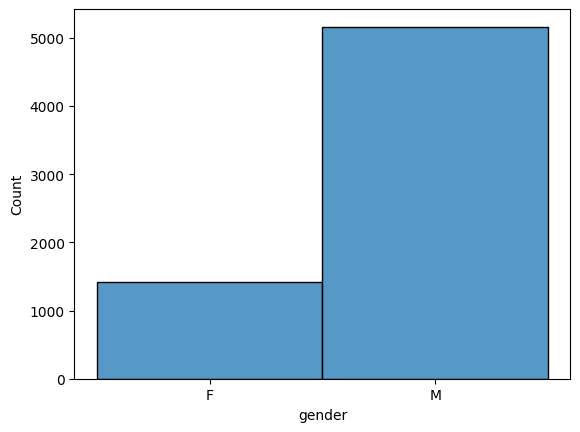

In [10]:
sns.histplot(data=marathon_data, x="gender")

The histogram plot of age_group shows that the 35-54 age group is the most popular. Once again this is based on this dataset which is from publicly provided data but the representation is likely to be close to what is seen at marathon races.

<AxesSubplot: xlabel='age_group', ylabel='Count'>

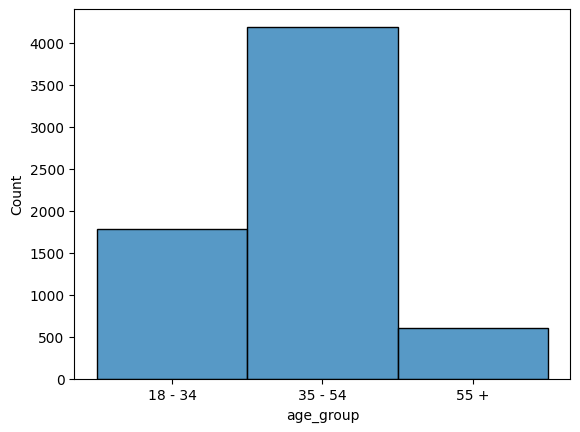

In [11]:
sns.histplot(data=marathon_data, x="age_group")

The country histogram plot is reduced to only the top 20 countries for visibility reasons. This plot may be more of an indication of Strava's reach than actual distribution of runners.

<AxesSubplot: xlabel='Count', ylabel='country'>

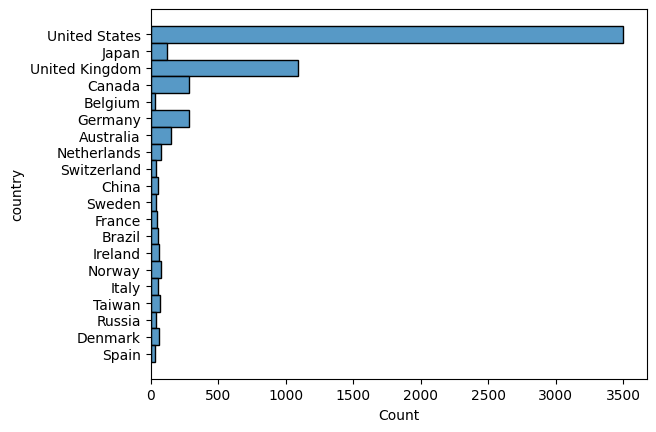

In [12]:
sns.histplot(data=marathon_data[marathon_data["country"].isin(marathon_data.groupby(
    "country").count().sort_values("index", ascending=False).index[:20])], y="country")


The mean, standard deviation, minimum, 25%, 50%, 75%, and maximum of each feature are shown. The dataset was limited to runners that had more than 0 km for week 1. Each week from there are was left alone and each of those weeks has a runner that didn't get any runs recorded.

In [13]:
marathon_data.describe()

,index,week_1_total_distance,week_2_total_distance,week_3_total_distance,week_4_total_distance,week_5_total_distance,week_6_total_distance,week_7_total_distance,week_8_total_distance,week_9_total_distance,...,week_10_total_runs,week_11_total_runs,week_12_total_runs,week_13_total_runs,week_14_total_runs,week_15_total_runs,week_16_total_runs,distance,duration,pace
count,6583.000000,6583.00000,6583.000000,6583.000000,6583.000000,6583.000000,6583.000000,6583.000000,6583.000000,6583.000000,...,6583.000000,6583.000000,6583.000000,6583.000000,6583.000000,6583.000000,6583.000000,6583.000000,6583.000000,6583.000000
mean,5766.993316,52.14329,51.448033,51.887576,52.419937,52.346213,51.904596,52.493178,53.663772,54.156436,...,3.575270,3.616588,3.644235,3.677351,3.721707,3.673249,2.869057,42.279448,221.127414,5.230973
std,3341.065969,38.26505,40.241048,40.100301,40.884741,40.275368,40.546698,40.937759,41.332930,41.707951,...,2.120083,2.098105,2.092033,2.089341,2.042550,2.000234,1.624651,0.147467,47.555781,1.129537
min,1.000000,0.13000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,41.800000,132.000000,3.122044
25%,2886.500000,23.13000,20.889500,21.195000,20.940000,21.175000,19.965000,20.965000,22.265000,22.380000,...,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,42.200000,188.000000,4.439197
50%,5780.000000,44.17000,44.300000,44.970000,45.390000,46.160000,45.580000,46.060000,47.320000,47.080000,...,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,3.000000,42.290000,211.566667,5.000000
75%,8674.500000,71.12500,74.180000,73.495000,74.935000,74.615000,75.180000,75.874500,76.889500,77.860000,...,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,4.000000,42.400000,242.000000,5.732861
max,11453.000000,455.98800,409.020000,350.740000,369.010000,356.010000,372.700000,408.830000,350.240000,408.830000,...,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,6.000000,42.490000,471.000000,11.142654


## Pace data

The marathon pace data and finish time distribution is right skewd indicating the marjority of the runners in the dataset have faster finish times. This could be a factor of bias selection since faster runners are likely to want to show their progress compared to new or slower runners.

[Text(0.5, 1.0, 'Marathon Pace')]

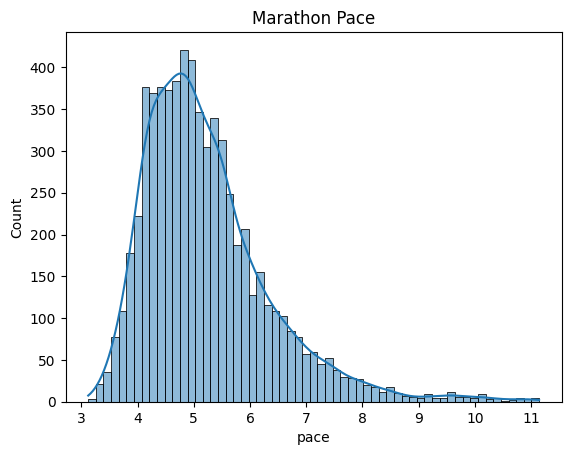

In [14]:
sns.histplot(data=y, x="pace", kde=True).set(title="Marathon Pace")

[Text(0.5, 1.0, 'Marathon Finish Time')]

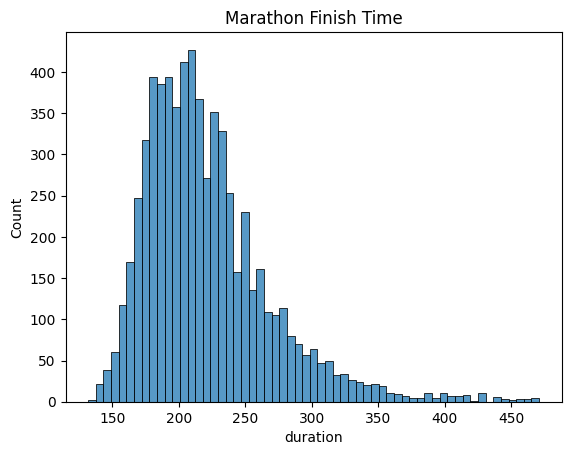

In [15]:
sns.histplot(data=y, x="duration").set(title="Marathon Finish Time")

## Box Plot

The box plots show the distribution of finish times along age group and gender. For each group there is still a large number of runners that fall out of the main body of runners. This likely an indication of newer or less serious runners that still want to complete a marathon. 

<AxesSubplot: xlabel='age_group', ylabel='duration'>

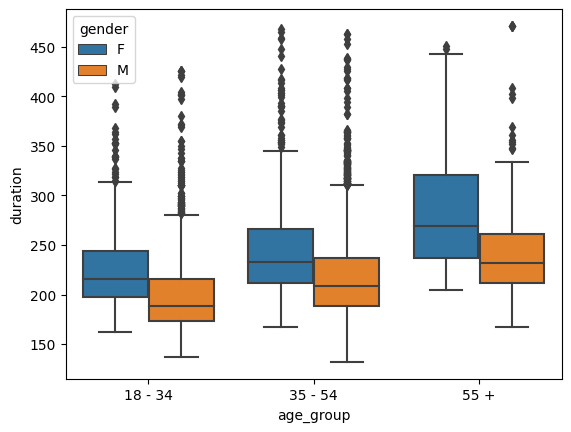

In [16]:
sns.boxplot(data=y, x="age_group", y="duration", hue="gender")